In [3]:
import subprocess
import sys

def import_or_install(module_name):
    try:
        # 嘗試導入模組
        __import__(module_name)
    except ImportError:
        # 如果模組不存在，則安裝它
        subprocess.check_call([sys.executable, "-m", "pip", "install", module_name])

# 測試範例
import_or_install("scipy")
import_or_install("numpy")
import_or_install("matplotlib")

  Using cached matplotlib-3.9.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.1-cp312-cp312-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


## 離散餘弦轉換（DCT）的範例

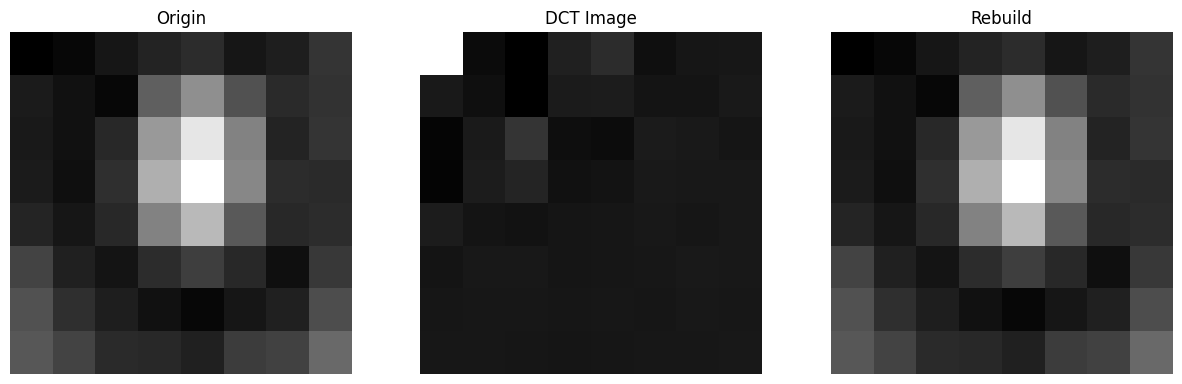

In [5]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# 定義一個8x8的灰階影像
image = np.array([
    [52, 55, 61, 66, 70, 61, 64, 73],
    [63, 59, 55, 90, 109, 85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126, 88, 68, 70],
    [79, 65, 60, 70, 77, 68, 58, 75],
    [85, 71, 64, 59, 55, 61, 65, 83],
    [87, 79, 69, 68, 65, 76, 78, 94]
])

# 對每一列進行DCT
dct_1d = dct(image, axis=0, norm='ortho')

# 對每一行進行DCT
dct_2d = dct(dct_1d, axis=1, norm='ortho')

# 對每一列進行IDCT（逆DCT）
idct_1d = idct(dct_2d, axis=0, norm='ortho')

# 對每一行進行IDCT
reconstructed_image = idct(idct_1d, axis=1, norm='ortho')

# 繪製原始影像、DCT 係數矩陣和重建的影像
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 原始影像
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Origin')
axs[0].axis('off')

# DCT 係數矩陣
axs[1].imshow(dct_2d, cmap='gray')
axs[1].set_title('DCT Image')
axs[1].axis('off')

# 重建的影像
axs[2].imshow(np.round(reconstructed_image).astype(int), cmap='gray')
axs[2].set_title('Rebuild')
axs[2].axis('off')

plt.show()